### Libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import warnings
warnings.filterwarnings('ignore')

## a. Calculate the correlation matrix

*cor_matrix* contains the full correlation matrix. The table below shows a snapshot of the first 5 rows.

In [2]:
#reads the csv
stocks = pd.read_csv('STOCKDATA.csv')
#craetes a correlation matrix
cor_matrix = stocks.iloc[:,1:].corr()
#shows the first 5 rows
cor_matrix.head()

BRK-A         V        MA        GS       BAC       JPM    WFC-PL  \
BRK-A  1.000000  0.326537  0.335555  0.439920  0.631294  0.761247  0.530021   
V      0.326537  1.000000  0.993848 -0.221282 -0.177815  0.144107  0.725322   
MA     0.335555  0.993848  1.000000 -0.216184 -0.181043  0.131757  0.712157   
GS     0.439920 -0.221282 -0.216184  1.000000  0.747526  0.626653  0.107527   
BAC    0.631294 -0.177815 -0.181043  0.747526  1.000000  0.907892  0.302394   

           PYPL       WFC         C  ...       WRB       FNF       LNC  \
BRK-A  0.199396  0.204438  0.465033  ...  0.514118  0.600109  0.288986   
V      0.828656 -0.714173 -0.365705  ...  0.804646  0.049205 -0.652291   
MA     0.842491 -0.725558 -0.381890  ...  0.796265  0.040999 -0.661523   
GS    -0.137782  0.512862  0.689371  ... -0.077189  0.546031  0.666807   
BAC   -0.383746  0.747022  0.935229  ...  0.205615  0.843658  0.774101   

           SBNY     HBANO       CNA       IVZ       FDS      LPLA       ATH  
BRK-A  0.332496  0.275723  0.277673  0.148386  0.221278  0.621367  0.560071  
V     -0.390237 -0.178654 -0.617529 -0.753177  0.924275  0.751253 -0.459494  
MA    -0.399039 -0.178097 -0.626910 -0.746072  0.926929  0.753593 -0.456121  
GS     0.707590  0.621481  0.554154  0.735115 -0.260264  0.172683  0.746535  
BAC    0.816814  0.630390  0.747042  0.621327 -0.341010  0.373214  0.837460  

[5 rows x 100 columns]

In [3]:
#extracts the indices from the correlation matrix, which are the stocks
stocks = cor_matrix.index.values

In [4]:
#Changes from dataframe to matrix, so it is easier to create a graph with networkx
cor_matrix = np.asmatrix(cor_matrix)

## b. Create graph

In [12]:
#Crates graph using the data of the correlation matrix
G = nx.from_numpy_matrix(cor_matrix)

#relabels the nodes to match the  stocks names
G = nx.relabel_nodes(G,lambda x: stocks[x])

#Shows the first 5 edges with their corresponding edges
list(G.edges(data=True))[:5]

[('BRK-A', 'BRK-A', {'weight': 1.0}),
 ('BRK-A', 'V', {'weight': 0.3265366279101738}),
 ('BRK-A', 'MA', {'weight': 0.33555533257353126}),
 ('BRK-A', 'GS', {'weight': 0.4399195998612235}),
 ('BRK-A', 'BAC', {'weight': 0.6312938291432498})]

## Part 1: The basic graph

In [24]:
#function to create and display networks from the correlatin matrix. 

def create_corr_network_1(G):
    #crates a list for edges and for the weights
    edges,weights = zip(*nx.get_edge_attributes(G,'weight').items())

    #positions
    positions=nx.circular_layout(G)
    
    #Figure size
    plt.figure(figsize=(15,15))

    #draws nodes
    nx.draw_networkx_nodes(G,positions,node_color='#DA70D6',
                           node_size=500,alpha=0.8)
    
    #Styling for labels
    nx.draw_networkx_labels(G, positions, font_size=8, 
                            font_family='sans-serif')
        
    #draws the edges
    nx.draw_networkx_edges(G, positions, edge_list=edges,style='solid')
    
    # displays the graph without axis
    plt.axis('off')
    #saves image
    plt.savefig("part1.png", format="PNG")
    plt.show() 



TypeError: draw_networkx_edges() got an unexpected keyword argument 'edge_list'

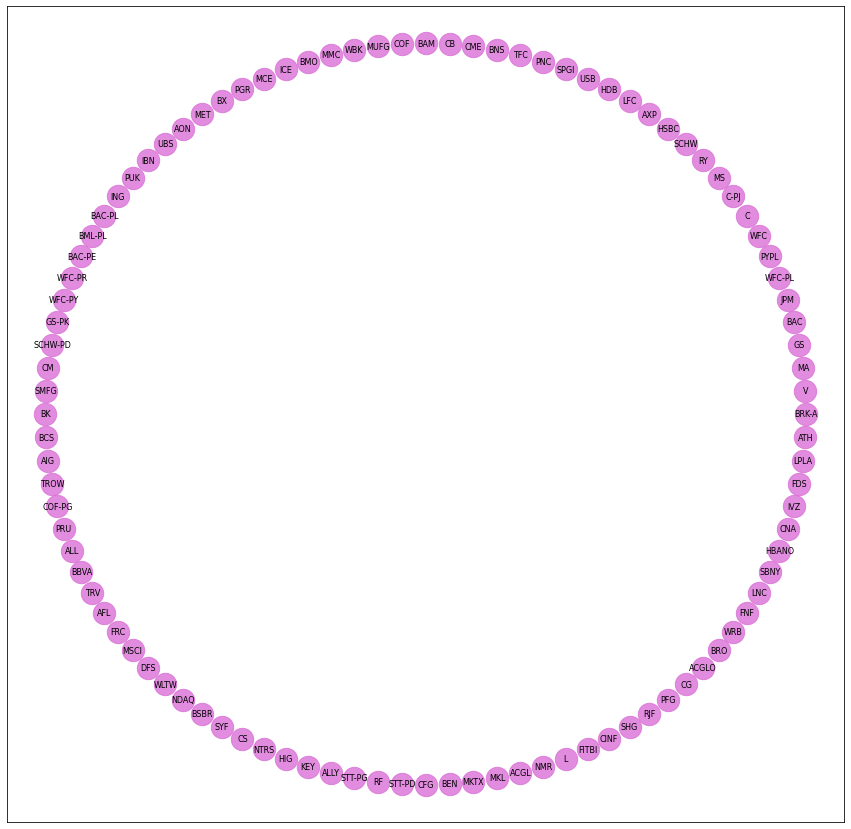

In [19]:
create_corr_network_1(G)

## Part 2: Separating between negative and positive correlations

In [20]:
#function to create and display networks from the correlatin matrix. 

def create_corr_network_2(G, corr_direction):
    ##Creates a copy of the graph
    H = G.copy()
    
    ##Checks all the edges and removes some based on corr_direction
    for stock1, stock2, weight in G.edges_iter(data=True):
        ##if we only want to see the positive correlations we then delete the edges with weight smaller than 0
        if corr_direction == "positive":
            if weight["weight"] <0:
                H.remove_edge(stock1, stock2)
        ##this part runs if the corr_direction is negative and removes edges with weights equal or largen than 0
        else:
            if weight["weight"] >=0:
                H.remove_edge(stock1, stock2)
                
    
    #crates a list for edges and for the weights
    edges,weights = zip(*nx.get_edge_attributes(H,'weight').items())

    #positions
    positions=nx.circular_layout(H)
    
    #Figure size
    plt.figure(figsize=(15,15))

    #draws nodes
    nx.draw_networkx_nodes(H,positions,node_color='#DA70D6',
                           node_size=500,alpha=0.8)
    
    #Styling for labels
    nx.draw_networkx_labels(H, positions, font_size=8, 
                            font_family='sans-serif')
        
    #draws the edges
    nx.draw_networkx_edges(H, positions, edge_list=edges,style='solid')
    
    # displays the graph without axis
    plt.axis('off')
    #saves image
    plt.savefig("part2" + corr_direction + ".png", format="PNG")
    plt.show() 


In [21]:
create_corr_network_2(G,corr_direction="positive")

AttributeError: 'Graph' object has no attribute 'edges_iter'

In [22]:
create_corr_network_2(G,corr_direction="negative")

AttributeError: 'Graph' object has no attribute 'edges_iter'

## Part 3: Styling the edges based on their weights

In [180]:
#function to create and display networks from the correlatin matrix. 

def create_corr_network_3(G, corr_direction):
    ##Creates a copy of the graph
    H = G.copy()
    
    ##Checks all the edges and removes some based on corr_direction
    for stock1, stock2, weight in G.edges_iter(data=True):
        ##if we only want to see the positive correlations we then delete the edges with weight smaller than 0
        if corr_direction == "positive":
            if weight["weight"] <0:
                H.remove_edge(stock1, stock2)
        ##this part runs if the corr_direction is negative and removes edges with weights equal or largen than 0
        else:
            if weight["weight"] >=0:
                H.remove_edge(stock1, stock2)
                
    
    #crates a list for edges and for the weights
    edges,weights = zip(*nx.get_edge_attributes(H,'weight').items())
    
    ### increases the value of weights, so that they are more visible in the graph
    weights = tuple([(1+abs(x))**2 for x in weights])

    #positions
    positions=nx.circular_layout(H)
    
    #Figure size
    plt.figure(figsize=(15,15))

    #draws nodes
    nx.draw_networkx_nodes(H,positions,node_color='#DA70D6', 
                           node_size=500,alpha=0.8)
    
    #Styling for labels
    nx.draw_networkx_labels(H, positions, font_size=8, 
                            font_family='sans-serif')
    
    ###edge colors based on weight direction
    if corr_direction == "positive":
        edge_colour = plt.cm.GnBu 
    else:
        edge_colour = plt.cm.PuRd
        
    #draws the edges
    nx.draw_networkx_edges(H, positions, edge_list=edges,style='solid',
                          ###adds width=weights and edge_color = weights 
                          ###so that edges are based on the weight parameter 
                          ###edge_cmap is for the color scale based on the weight
                          ### edge_vmin and edge_vmax assign the min and max weights for the width
                          width=weights, edge_color = weights, edge_cmap = edge_colour,
                          edge_vmin = min(weights), edge_vmax=max(weights))

    # displays the graph without axis
    plt.axis('off')
    #saves image
    plt.savefig("part3" + corr_direction + ".png", format="PNG")
    plt.show() 


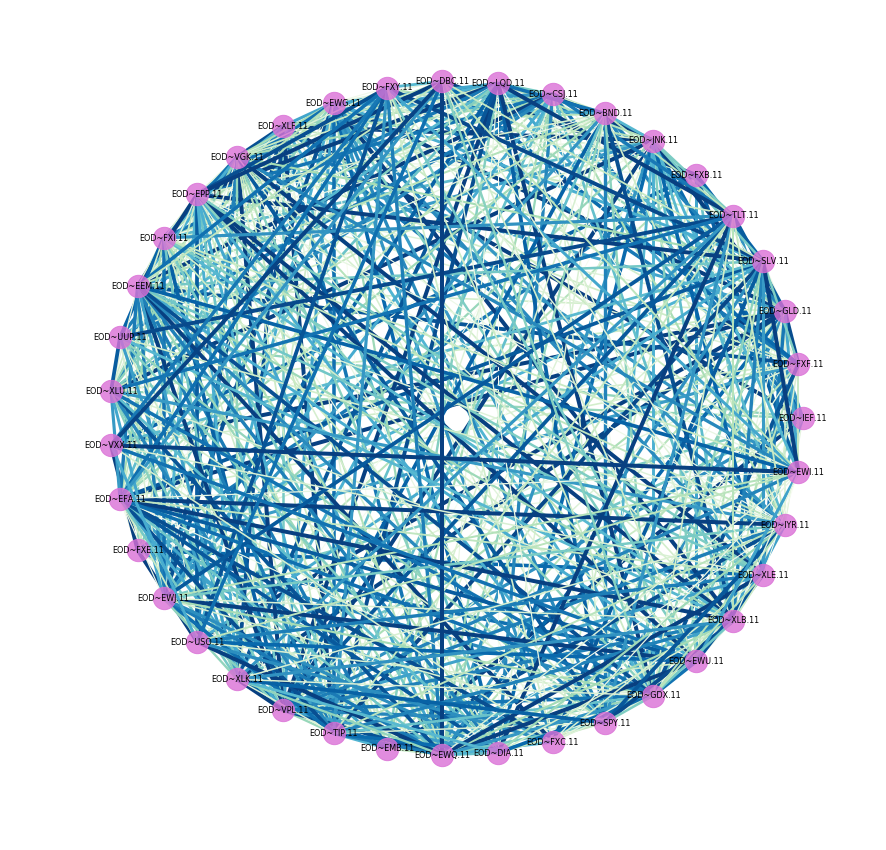

In [195]:
create_corr_network_3(G, corr_direction="positive")

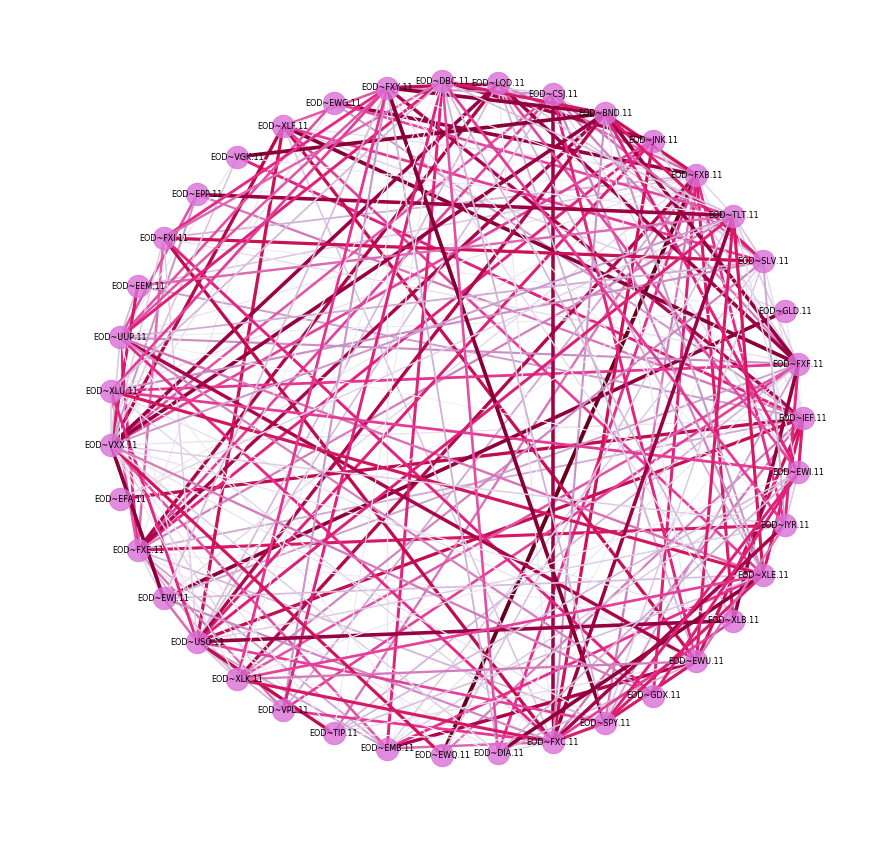

In [196]:
create_corr_network_3(G, corr_direction="negative")

## Part 4: Filtering edges with a minimum correlation

In [182]:
#function to create and display networks from the correlatin matrix. 

def create_corr_network_4(G, corr_direction, min_correlation):
    ##Creates a copy of the graph
    H = G.copy()
    
    ##Checks all the edges and removes some based on corr_direction
    for stock1, stock2, weight in G.edges_iter(data=True):
        ##if we only want to see the positive correlations we then delete the edges with weight smaller than 0        
        if corr_direction == "positive":
            ####it adds a minimum value for correlation. 
            ####If correlation weaker than the min, then it deletes the edge
            if weight["weight"] <0 or weight["weight"] < min_correlation:
                H.remove_edge(stock1, stock2)
        ##this part runs if the corr_direction is negative and removes edges with weights equal or largen than 0
        else:
            ####it adds a minimum value for correlation. 
            ####If correlation weaker than the min, then it deletes the edge
            if weight["weight"] >=0 or weight["weight"] > min_correlation:
                H.remove_edge(stock1, stock2)
                
    
    #crates a list for edges and for the weights
    edges,weights = zip(*nx.get_edge_attributes(H,'weight').items())
    
    ### increases the value of weights, so that they are more visible in the graph
    weights = tuple([(1+abs(x))**2 for x in weights])

    #positions
    positions=nx.circular_layout(H)
    
    #Figure size
    plt.figure(figsize=(15,15))

    #draws nodes
    nx.draw_networkx_nodes(H,positions,node_color='#DA70D6',
                           node_size=500,alpha=0.8)
    
    #Styling for labels
    nx.draw_networkx_labels(H, positions, font_size=8, 
                            font_family='sans-serif')
    
    ###edge colors based on weight direction
    if corr_direction == "positive":
        edge_colour = plt.cm.GnBu 
    else:
        edge_colour = plt.cm.PuRd
        
    #draws the edges
    nx.draw_networkx_edges(H, positions, edge_list=edges,style='solid',
                          ###adds width=weights and edge_color = weights 
                          ###so that edges are based on the weight parameter 
                          ##edge_cmap is for the color scale based on the weight
                          ### edge_vmin and edge_vmax assign the min and max weights for the width
                          width=weights, edge_color = weights, edge_cmap = edge_colour,
                          edge_vmin = min(weights), edge_vmax=max(weights))

    # displays the graph without axis
    plt.axis('off')
    #saves image
    plt.savefig("part4" + corr_direction + ".png", format="PNG")
    plt.show() 


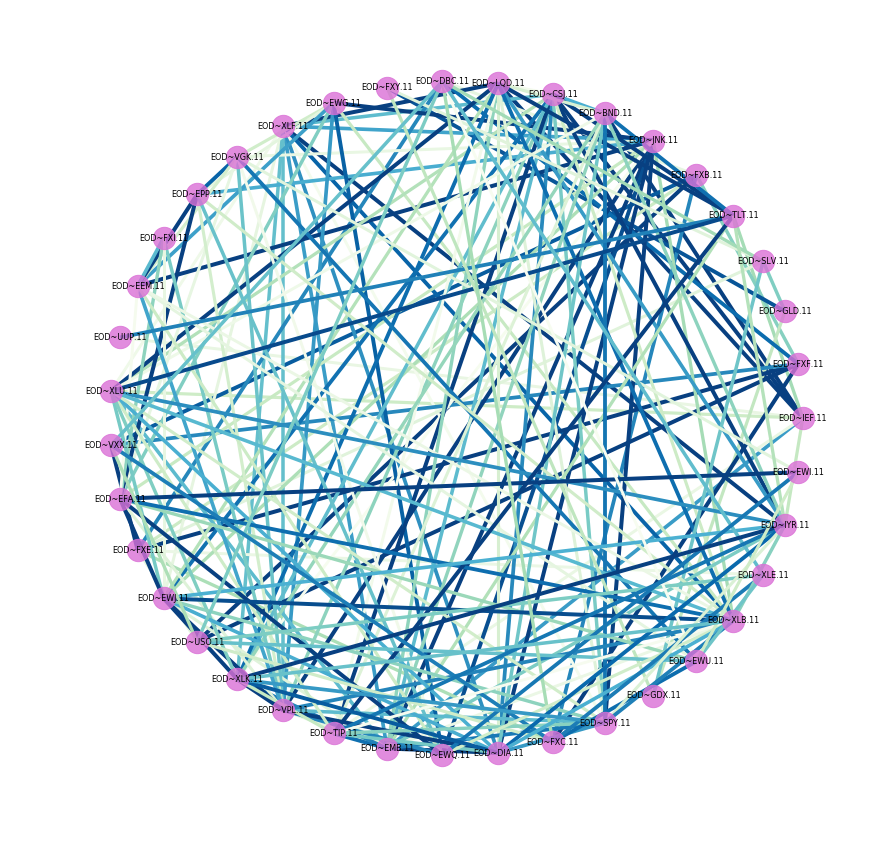

In [197]:
create_corr_network_4(G, corr_direction="positive", min_correlation = 0.7)

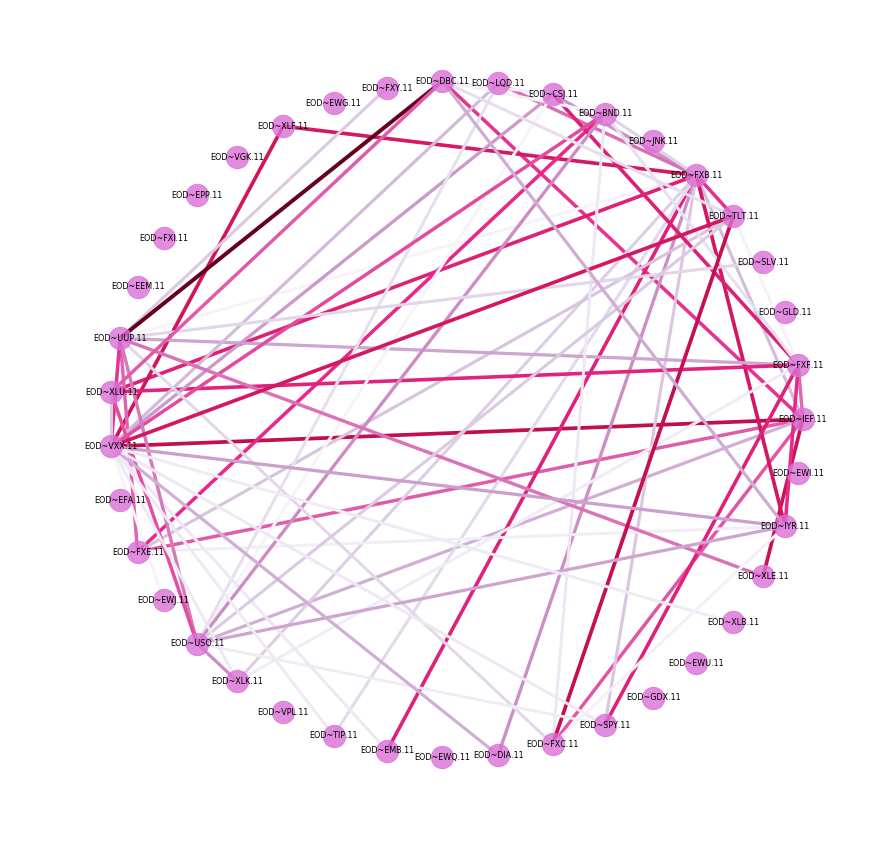

In [198]:
create_corr_network_4(G, corr_direction="negative", min_correlation = -0.7)

## Part 5: Styling the nodes based on the number of edges linked (degree)

In [185]:
#function to create and display networks from the correlatin matrix. 

def create_corr_network_5(G, corr_direction, min_correlation):
    ##Creates a copy of the graph
    H = G.copy()
    
    ##Checks all the edges and removes some based on corr_direction
    for stock1, stock2, weight in G.edges_iter(data=True):
        ##if we only want to see the positive correlations we then delete the edges with weight smaller than 0        
        if corr_direction == "positive":
            ####it adds a minimum value for correlation. 
            ####If correlation weaker than the min, then it deletes the edge
            if weight["weight"] <0 or weight["weight"] < min_correlation:
                H.remove_edge(stock1, stock2)
        ##this part runs if the corr_direction is negative and removes edges with weights equal or largen than 0
        else:
            ####it adds a minimum value for correlation. 
            ####If correlation weaker than the min, then it deletes the edge
            if weight["weight"] >=0 or weight["weight"] > min_correlation:
                H.remove_edge(stock1, stock2)
                
    
    #crates a list for edges and for the weights
    edges,weights = zip(*nx.get_edge_attributes(H,'weight').items())
    
    ### increases the value of weights, so that they are more visible in the graph
    weights = tuple([(1+abs(x))**2 for x in weights])
    
    #####calculates the degree of each node
    d = nx.degree(H)
    #####creates list of nodes and a list their degrees that will be used later for their sizes
    nodelist, node_sizes = zip(*d.items())

    #positions
    positions=nx.circular_layout(H)
    
    #Figure size
    plt.figure(figsize=(15,15))

    #draws nodes
    nx.draw_networkx_nodes(H,positions,node_color='#DA70D6',nodelist=nodelist,
                           #####the node size will be now based on its degree
                           node_size=tuple([x**3 for x in node_sizes]),alpha=0.8)
    
    #Styling for labels
    nx.draw_networkx_labels(H, positions, font_size=8, 
                            font_family='sans-serif')
    
    ###edge colors based on weight direction
    if corr_direction == "positive":
        edge_colour = plt.cm.GnBu 
    else:
        edge_colour = plt.cm.PuRd
        
    #draws the edges
    nx.draw_networkx_edges(H, positions, edge_list=edges,style='solid',
                          ###adds width=weights and edge_color = weights 
                          ###so that edges are based on the weight parameter 
                          ###edge_cmap is for the color scale based on the weight
                          ### edge_vmin and edge_vmax assign the min and max weights for the width
                          width=weights, edge_color = weights, edge_cmap = edge_colour,
                          edge_vmin = min(weights), edge_vmax=max(weights))

    # displays the graph without axis
    plt.axis('off')
    #saves image
    plt.savefig("part5" + corr_direction + ".png", format="PNG")
    plt.show() 


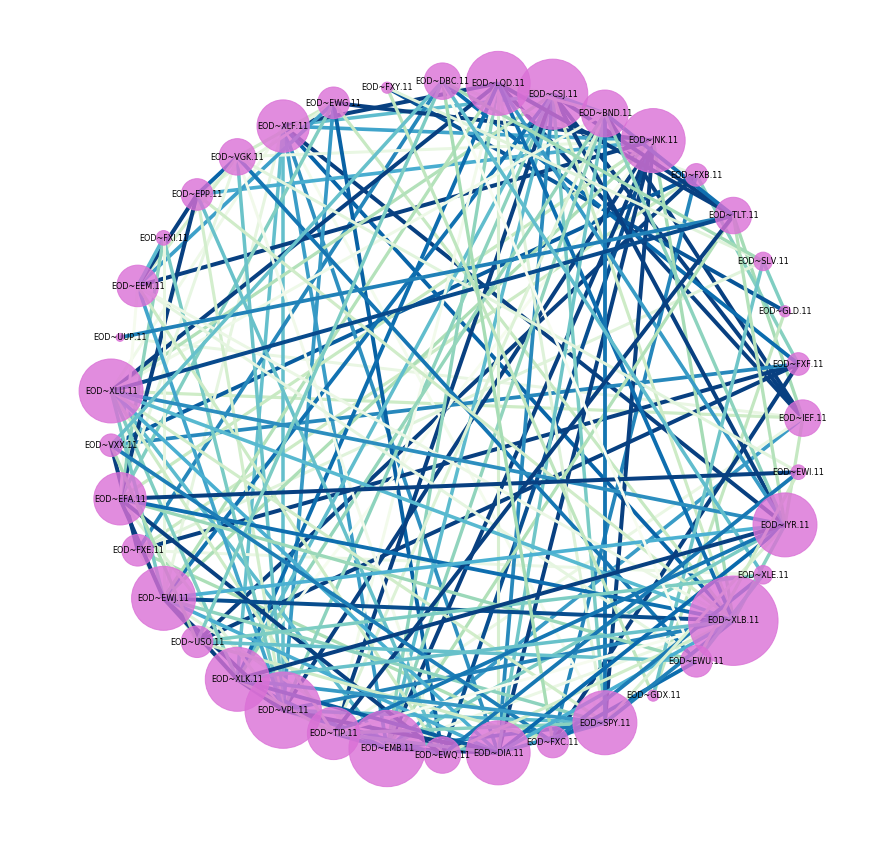

In [199]:
create_corr_network_5(G, corr_direction="positive",min_correlation=0.7)

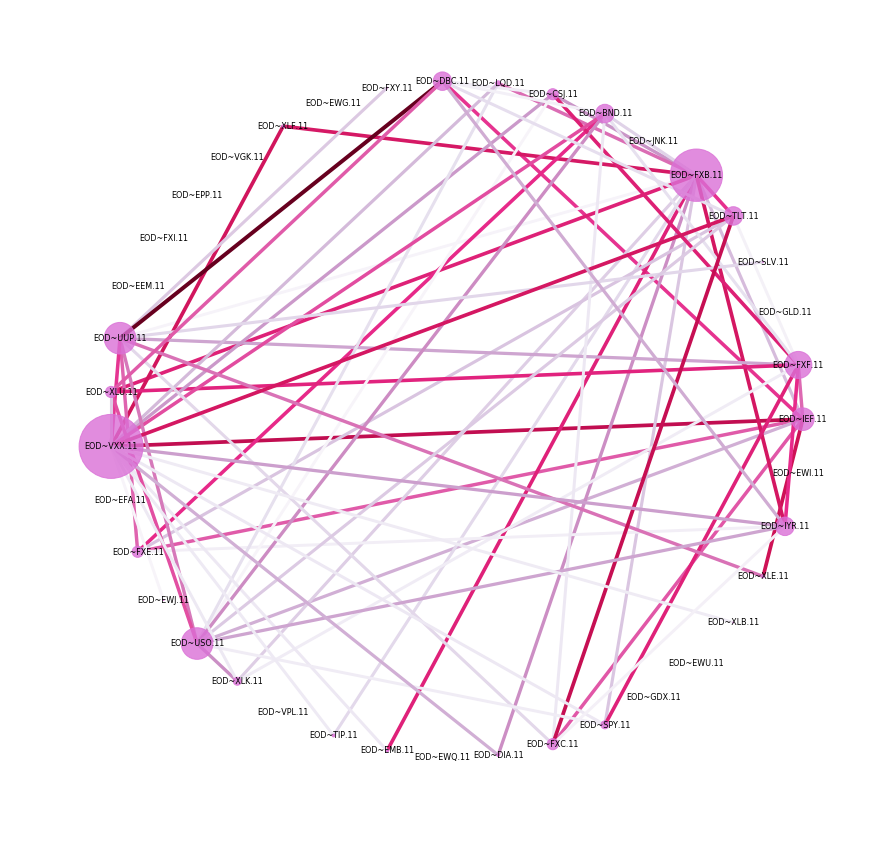

In [200]:
create_corr_network_5(G, corr_direction="negative",min_correlation=-0.7)